# Used Cars Recommendation System

## Introduction
This notebook develops a recommendation system for used cars based on user preferences and car characteristics, such as price, manufacturer, and type.

## Objectives
- Help customers choose cars based on preferences and budgets.
- Ensure alternative suggestions if exact criteria are unavailable.
- Handle the cold-start problem by improving recommendations as user interactions grow.

### Dataset
The project uses the `vehicles.csv` dataset as the primary source.


## Step 1: Load and Explore the Dataset

In [1]:

# Load the dataset
import pandas as pd

data_path = 'vehicles.csv'  # Path to the dataset
data = pd.read_csv(data_path)

# Display basic information about the dataset
print("Dataset Overview:")
print(data.info())

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null 

### Check the data table

In [2]:
print(data.head().T)

                                                              0  \
id                                                   7222695916   
url           https://prescott.craigslist.org/cto/d/prescott...   
region                                                 prescott   
region_url                      https://prescott.craigslist.org   
price                                                      6000   
year                                                        NaN   
manufacturer                                                NaN   
model                                                       NaN   
condition                                                   NaN   
cylinders                                                   NaN   
fuel                                                        NaN   
odometer                                                    NaN   
title_status                                                NaN   
transmission                                                Na

## Step 2: Handle Missing Values

#### Check Missing values

In [3]:
print(data.isnull().sum())

id                   0
url                  0
region               0
region_url           0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
image_url           68
description         70
county          426880
state                0
lat               6549
long              6549
posting_date        68
dtype: int64


In [4]:

# Drop irrelevant columns
irrelevant_columns = ['url', 'region_url', 'image_url', 'description', 'county', 'VIN']
data = data.drop(columns=irrelevant_columns)

# Fill missing numerical columns
numerical_columns = ['year', 'odometer', 'price']
for col in numerical_columns:
    data[col].fillna(data[col].median(), inplace=True)

# Fill missing categorical columns
categorical_columns = [
    'manufacturer', 'model', 'condition', 'cylinders', 'fuel', 'title_status',
    'transmission', 'drive', 'size', 'type', 'paint_color'
]
for col in categorical_columns:
    data[col].fillna('unknown', inplace=True)

print("Missing values handled.")


Missing values handled.


## Step 3: Statistical Analysis and Visualization

Summary Statistics:
                 id         price           year      odometer            lat  \
count  4.268800e+05  4.268800e+05  426880.000000  4.268800e+05  420331.000000   
mean   7.311487e+09  7.519903e+04    2011.240173  9.791454e+04      38.493940   
std    4.473170e+06  1.218228e+07       9.439234  2.127801e+05       5.841533   
min    7.207408e+09  0.000000e+00    1900.000000  0.000000e+00     -84.122245   
25%    7.308143e+09  5.900000e+03    2008.000000  3.813000e+04      34.601900   
50%    7.312621e+09  1.395000e+04    2013.000000  8.554800e+04      39.150100   
75%    7.315254e+09  2.648575e+04    2017.000000  1.330000e+05      42.398900   
max    7.317101e+09  3.736929e+09    2022.000000  1.000000e+07      82.390818   

                long  
count  420331.000000  
mean      -94.748599  
std        18.365462  
min      -159.827728  
25%      -111.939847  
50%       -88.432600  
75%       -80.832039  
max       173.885502  


/usr/local/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


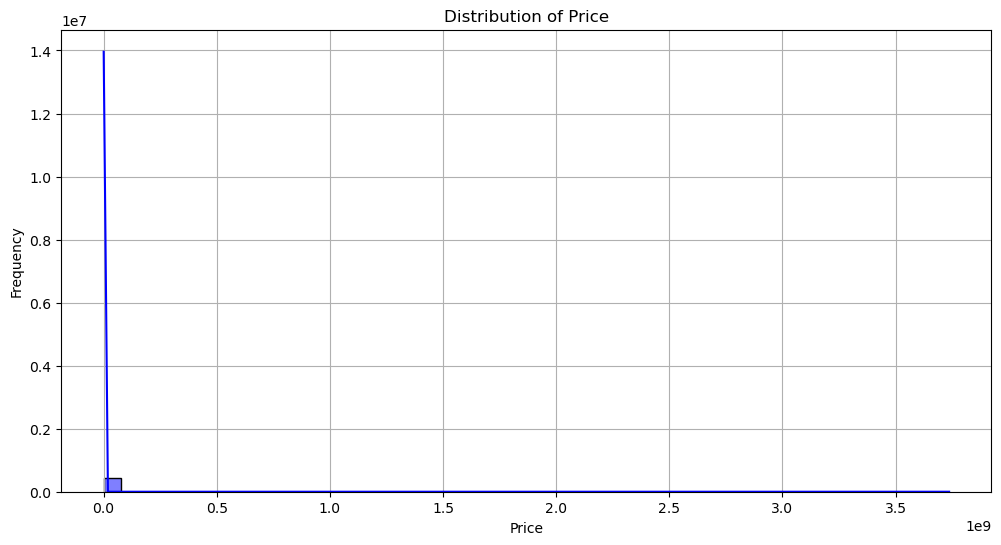

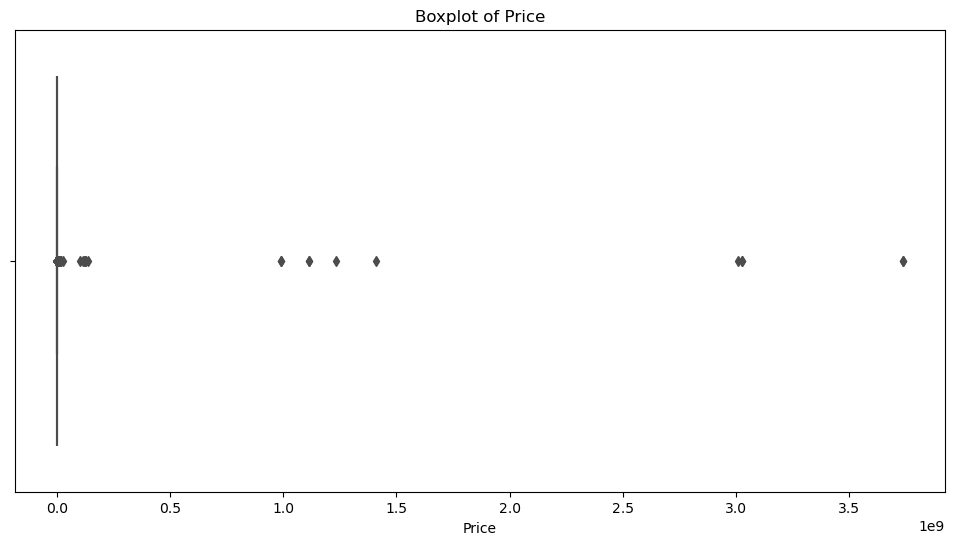

In [5]:

import matplotlib.pyplot as plt
import seaborn as sns

# Summary statistics
print("Summary Statistics:")
print(data.describe())

# Visualize distributions
plt.figure(figsize=(12, 6))
sns.histplot(data['price'], bins=50, kde=True, color='blue')
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x=data['price'], color='red')
plt.title('Boxplot of Price')
plt.xlabel('Price')
plt.show()


### Adjust dataset removing outliers 

In [6]:
data = data[(data['price'] > 500) & (data['price'] < 100000)]
data['price'] = data.groupby(['manufacturer', 'type'])['price'].transform(lambda x: x.replace(0, x.median()))


## Plot graphs again

Summary Statistics:
                 id          price           year      odometer  \
count  3.830680e+05  383068.000000  383068.000000  3.830680e+05   
mean   7.311463e+09   19202.321011    2010.982280  9.840968e+04   
std    4.475544e+06   14375.118732       9.573337  1.887530e+05   
min    7.207408e+09     501.000000    1900.000000  0.000000e+00   
25%    7.308081e+09    7900.000000    2008.000000  3.861900e+04   
50%    7.312576e+09   15937.000000    2013.000000  8.712350e+04   
75%    7.315243e+09   27990.000000    2017.000000  1.359900e+05   
max    7.317101e+09   99999.000000    2022.000000  1.000000e+07   

                 lat           long  
count  379616.000000  379616.000000  
mean       38.516418     -94.336313  
std         5.846494      18.086249  
min       -84.122245    -159.719900  
25%        34.708828    -110.960000  
50%        39.230033     -88.030529  
75%        42.354200     -80.830000  
max        82.390818     167.629911  


/usr/local/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


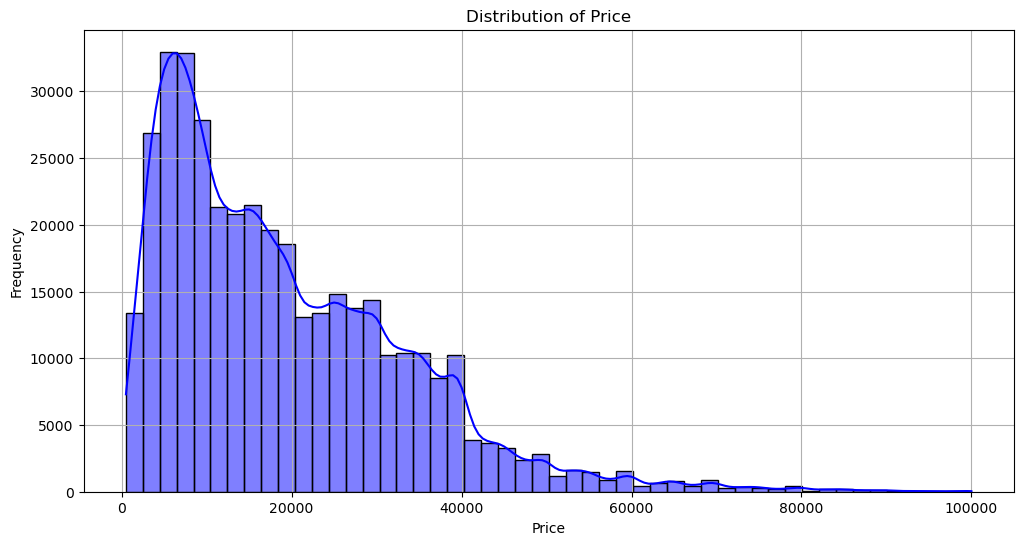

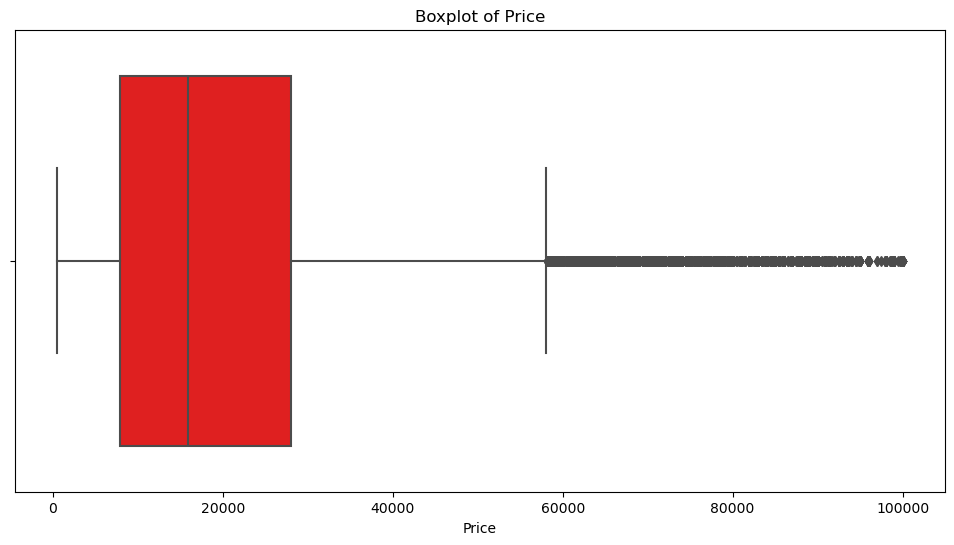

In [7]:
# Summary statistics
print("Summary Statistics:")
print(data.describe())

# Visualize distributions
plt.figure(figsize=(12, 6))
sns.histplot(data['price'], bins=50, kde=True, color='blue')
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x=data['price'], color='red')
plt.title('Boxplot of Price')
plt.xlabel('Price')
plt.show()

### Create 

In [8]:
lower_limit = data['price'].quantile(0.01)
upper_limit = data['price'].quantile(0.99)
data['price'] = data['price'].clip(lower=lower_limit, upper=upper_limit)


/usr/local/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


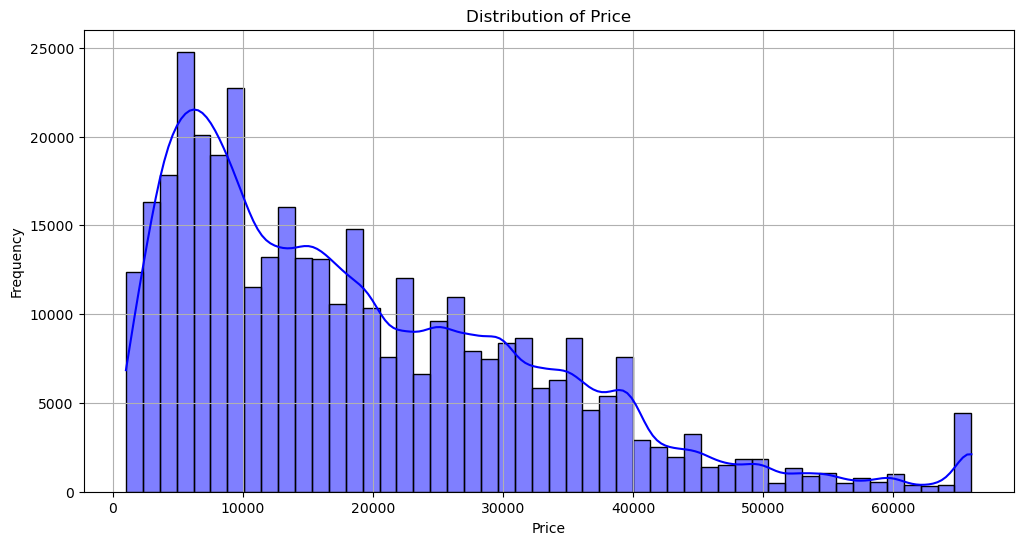

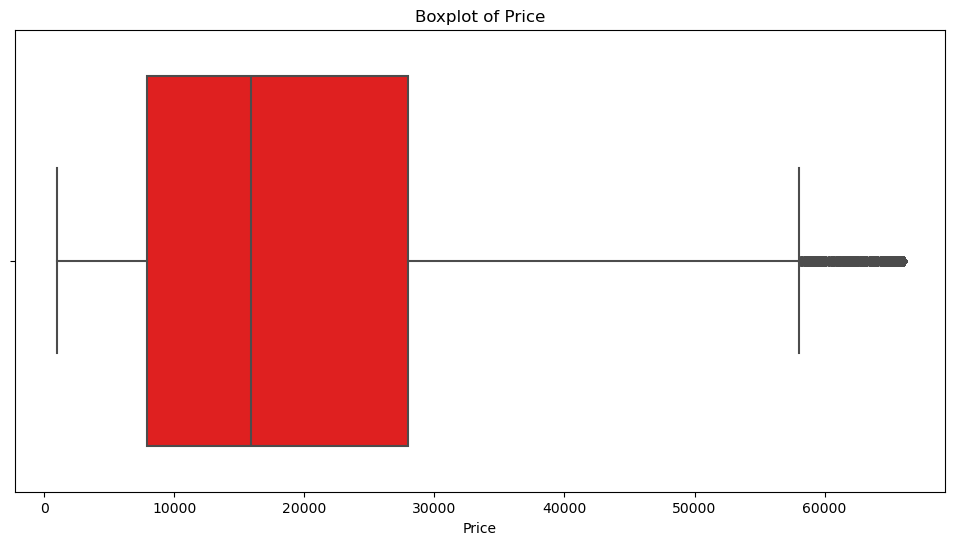

In [9]:
# Visualize distributions
plt.figure(figsize=(12, 6))
sns.histplot(data['price'], bins=50, kde=True, color='blue')
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x=data['price'], color='red')
plt.title('Boxplot of Price')
plt.xlabel('Price')
plt.show()

## Step 4: Feature Engineering

In [10]:

# Create derived features
from datetime import datetime

# Convert relevant numeric columns to integers (except 'price')
numeric_columns = ['year', 'odometer']
for col in numeric_columns:
    data[col] = data[col].astype(int)
# Calculate car age
current_year = datetime.now().year
data['car_age'] = current_year - data['year']

# Price per mile
data['price_per_mile'] = data['price'] / data['odometer'].replace(0, 1)

print("Derived features created.")


Derived features created.


### HANDLE MISSING VALUES

In [11]:
# Step 4: Handling Missing Values

# Identify numeric and categorical columns
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
categorical_columns = data.select_dtypes(include=['object']).columns

# Handle missing values in numeric columns by replacing with median
for col in numeric_columns:
    if data[col].isnull().sum() > 0:
        median_value = data[col].median()
        data[col].fillna(median_value, inplace=True)
        print(f"Filled NaN in numeric column '{col}' with median value: {median_value}")

# Handle missing values in categorical columns by replacing with 'unknown'
for col in categorical_columns:
    if data[col].isnull().sum() > 0:
        data[col].fillna('unknown', inplace=True)
        print(f"Filled NaN in categorical column '{col}' with 'unknown'")

# Confirm no remaining NaN values
print("Remaining NaN values in dataset:")
print(data.isnull().sum())


Filled NaN in numeric column 'lat' with median value: 39.230033
Filled NaN in numeric column 'long' with median value: -88.0305285
Filled NaN in categorical column 'posting_date' with 'unknown'
Remaining NaN values in dataset:
id                0
region            0
price             0
year              0
manufacturer      0
model             0
condition         0
cylinders         0
fuel              0
odometer          0
title_status      0
transmission      0
drive             0
size              0
type              0
paint_color       0
state             0
lat               0
long              0
posting_date      0
car_age           0
price_per_mile    0
dtype: int64


## Step 5: Model Development

In [12]:
# STEP 5: Desenvolvimento do Modelo

# Salvar uma cópia do conjunto de dados original
data_original = data.copy()

# Criar uma cópia para o desenvolvimento do modelo
data_model = data.copy()

# Filtrar registros onde 'manufacturer' ou 'model' são 'unknown'
mask = (data_model['manufacturer'] != 'unknown') & (data_model['model'] != 'unknown')
data_model = data_model[mask]
data_original = data_original[mask]

# Importar bibliotecas necessárias
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import train_test_split

# Verificar valores únicos para 'transmission' e 'fuel'
print("Unique values in 'transmission':", data_model['transmission'].unique())
print("Unique values in 'fuel':", data_model['fuel'].unique())

# Aplicar One-Hot Encoding para 'transmission' e 'fuel'
transmission_dummies = pd.get_dummies(data_model['transmission'], prefix='transmission', dummy_na=False)
fuel_dummies = pd.get_dummies(data_model['fuel'], prefix='fuel', dummy_na=False)

# Salvar os nomes das colunas dummies para uso posterior
transmission_dummies_columns = transmission_dummies.columns.tolist()
fuel_dummies_columns = fuel_dummies.columns.tolist()

# Concatenar as colunas codificadas ao DataFrame do modelo
data_model = pd.concat([data_model, transmission_dummies, fuel_dummies], axis=1)

# Identificar colunas categóricas adicionais para codificação
additional_categorical_columns = ['manufacturer', 'type', 'model', 'condition', 'cylinders',
                                  'title_status', 'drive', 'size', 'paint_color']

# Aplicar codificação numérica (factorize) nessas colunas
for col in additional_categorical_columns:
    if col in data_model.columns:
        data_model[f'{col}_encoded'] = pd.factorize(data_model[col])[0]

# Remover as colunas categóricas originais do DataFrame do modelo
columns_to_drop = ['transmission', 'fuel', 'region', 'region_url', 'description', 'county',
                   'state', 'image_url', 'posting_date'] + additional_categorical_columns
data_model = data_model.drop(columns=columns_to_drop, errors='ignore')

# Preparar os dados para o modelo
X = data_model.drop(columns=['price'])  # Excluir a variável alvo
y = data_model['price']  # Definir a variável alvo

# Validar que todas as colunas são numéricas
non_numeric_columns = X.select_dtypes(include=['object']).columns
if len(non_numeric_columns) > 0:
    print("Warning: Non-numeric columns detected:", non_numeric_columns)
else:
    print("All features are numeric and ready for training.")

# Dividir os dados em conjuntos de treinamento e teste (opcional)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinar o modelo KNN com todos os dados (para recomendação)
knn = NearestNeighbors(n_neighbors=5, metric='euclidean')
knn.fit(X)

# Confirmação
print("KNN model trained successfully.")
print(f"Dataset size used for training: {X.shape}")

# Extrair valores únicos de 'fuel' e 'transmission' do data_original
unique_fuels = data_original['fuel'].dropna().unique().tolist()
unique_transmissions = data_original['transmission'].dropna().unique().tolist()

# Calcular o menor e o maior preço
min_price = int(data_original['price'].min())
max_price = int(data_original['price'].max())

print(f"Minimum price in the dataset: {min_price}")
print(f"Maximum price in the dataset: {max_price}")
print("Available fuel types:", unique_fuels)
print("Available transmissions:", unique_transmissions)


Unique values in 'transmission': ['other' 'automatic' 'manual' 'unknown']
Unique values in 'fuel': ['gas' 'other' 'diesel' 'hybrid' 'unknown' 'electric']
All features are numeric and ready for training.
KNN model trained successfully.
Dataset size used for training: (363498, 26)
Minimum price in the dataset: 1000
Maximum price in the dataset: 65995
Available fuel types: ['gas', 'other', 'diesel', 'hybrid', 'unknown', 'electric']
Available transmissions: ['other', 'automatic', 'manual', 'unknown']


### get the unique values of the columns

In [13]:
# Extrair valores únicos de 'fuel' e 'transmission' do data_original
unique_fuels = data_original['fuel'].dropna().unique().tolist()
unique_transmissions = data_original['transmission'].dropna().unique().tolist()
# Calcular o menor e o maior preço
min_price = data_original['price'].min()
max_price = data_original['price'].max()

print(f"Minimum price in the dataset: {min_price}")
print(f"Maximum price in the dataset: {max_price}")
print("Available fuel types:", unique_fuels)
print("Available transmissions:", unique_transmissions)


Minimum price in the dataset: 1000
Maximum price in the dataset: 65995
Available fuel types: ['gas', 'other', 'diesel', 'hybrid', 'unknown', 'electric']
Available transmissions: ['other', 'automatic', 'manual', 'unknown']


In [14]:
# STEP 6: Recomendação com Base nas Preferências do Usuário

# Remover 'unknown' das opções
unique_fuels = [fuel for fuel in unique_fuels if fuel != 'unknown']
unique_transmissions = [transmission for transmission in unique_transmissions if transmission != 'unknown']

print("Available fuel types:", unique_fuels)
print("Available transmissions:", unique_transmissions)
print(f"Minimum price in the dataset: {min_price}")
print(f"Maximum price in the dataset: {max_price}")

# Função para recomendar carros com base nas preferências do usuário
def recommend_cars(price_min, price_max, fuel, transmission, n_neighbors=5):
    # Filtrar os índices com base nas preferências do usuário
    filtered_indices = data_model[
        (data_model['price'] >= price_min) &
        (data_model['price'] <= price_max) &
        (data_original['fuel'] == fuel) &
        (data_original['transmission'] == transmission)
    ].index

    if filtered_indices.empty:
        print("Nenhum carro encontrado com as preferências selecionadas.")
        return None
    else:
        # Selecionar os dados filtrados
        filtered_data_model = data_model.loc[filtered_indices].copy()
        filtered_data_original = data_original.loc[filtered_indices].copy()

        # Remover duplicatas no filtered_data_original
        filtered_data_original = filtered_data_original.drop_duplicates(
            subset=['manufacturer', 'model', 'year', 'odometer', 'price']
        )

        # Atualizar filtered_data_model com base nos índices após remover duplicatas
        filtered_data_model = filtered_data_model.loc[filtered_data_original.index]

        # Resetar o índice para garantir o alinhamento
        filtered_data_model.reset_index(drop=True, inplace=True)
        filtered_data_original.reset_index(drop=True, inplace=True)

        # Preparar os dados para o KNN
        filtered_data_for_knn = filtered_data_model.drop(columns=['price']).copy()

        # Criar um DataFrame que corresponda à estrutura de 'filtered_data_for_knn'
        user_features = pd.DataFrame(columns=filtered_data_for_knn.columns)

        # Preencher as colunas numéricas com os valores médios do conjunto de dados filtrado
        numeric_cols = filtered_data_for_knn.select_dtypes(include=['int64', 'float64']).columns
        for col in numeric_cols:
            user_features.loc[0, col] = filtered_data_for_knn[col].mean()

        # One-Hot Encoding para 'fuel'
        for col in fuel_dummies_columns:
            user_features.loc[0, col] = 1 if col == f"fuel_{fuel}" else 0

        # One-Hot Encoding para 'transmission'
        for col in transmission_dummies_columns:
            user_features.loc[0, col] = 1 if col == f"transmission_{transmission}" else 0

        # Garantir que todas as outras features estejam preenchidas com zeros
        user_features.fillna(0, inplace=True)
        user_features = user_features[filtered_data_for_knn.columns]

        # Verificar se há dados suficientes para o KNN
        if len(filtered_data_for_knn) < n_neighbors:
            n_neighbors = len(filtered_data_for_knn)
            if n_neighbors == 0:
                print("Nenhum carro encontrado após o filtro.")
                return None

        # Aumentar o número de vizinhos para compensar as duplicatas removidas
        knn_neighbors = min(n_neighbors * 2, len(filtered_data_for_knn))

        # Realizar a previsão usando o modelo KNN
        knn_filtered = NearestNeighbors(n_neighbors=knn_neighbors, metric='euclidean')
        knn_filtered.fit(filtered_data_for_knn)
        distances, indices = knn_filtered.kneighbors(user_features)

        # Recuperar os índices dos carros recomendados
        recommended_indices = filtered_data_model.index[indices[0]]

        # Recuperar os carros recomendados do data_original filtrado
        recommended_cars = filtered_data_original.loc[recommended_indices]

        # Remover duplicatas das recomendações
        recommended_cars = recommended_cars.drop_duplicates(
            subset=['manufacturer', 'model', 'year', 'odometer', 'price']
        )

        # Limitar as recomendações ao número desejado
        recommended_cars = recommended_cars.head(n_neighbors)

        # Exibir apenas as colunas selecionadas para melhor legibilidade
        output_columns = ['price', 'manufacturer', 'model', 'year', 'fuel', 'transmission', 'odometer', 'car_age']
        recommended_cars_display = recommended_cars[output_columns]

        return recommended_cars_display



# Exemplo de uso da função com entradas dinâmicas
price_min = 10000
price_max = 40000
fuel = 'gas'  # Certifique-se de que o valor está disponível em unique_fuels
transmission = 'manual'  # Certifique-se de que o valor está disponível em unique_transmissions

recommended_cars = recommend_cars(price_min, price_max, fuel, transmission)

if recommended_cars is not None:
    print("Recommended cars based on user preferences:")
    print(recommended_cars)
else:
    print("No recommendations available based on the provided preferences.")


Available fuel types: ['gas', 'other', 'diesel', 'hybrid', 'electric']
Available transmissions: ['other', 'automatic', 'manual']
Minimum price in the dataset: 1000
Maximum price in the dataset: 65995
Recommended cars based on user preferences:
      price manufacturer                 model  year fuel transmission  \
1415  22000      porsche                  928s  1984  gas       manual   
3226  21000         jeep    wrangler unlimited  2009  gas       manual   
954   10999       subaru  impreza 2.0i premium  2012  gas       manual   
278   17334    chevrolet                camaro  2011  gas       manual   
2875  10000         jeep        wrangler sport  1997  gas       manual   

      odometer  car_age  
1415     79618       40  
3226    104000       15  
954      82089       12  
278      80909       13  
2875     84000       27  


In [15]:
# STEP 7: Exportar o Modelo como Arquivo Pickle

import pickle

# Treinar o modelo KNN com o conjunto de dados completo
knn_model = NearestNeighbors(n_neighbors=5, metric='euclidean')
knn_model.fit(X)

# Dados a serem salvos
model_data = {
    'knn_model': knn_model,
    'X': X,
    'data_model': data_model,
    'data_original': data_original,
    'fuel_dummies_columns': fuel_dummies_columns,
    'transmission_dummies_columns': transmission_dummies_columns,
    'min_price': min_price,
    'max_price': max_price,
    'unique_fuels': unique_fuels,
    'unique_transmissions': unique_transmissions,
}

# Salvar em um arquivo pickle
with open('car_recommendation_model.pkl', 'wb') as file:
    pickle.dump(model_data, file)

print("Model exported successfully as 'car_recommendation_model.pkl'.")


Model exported successfully as 'car_recommendation_model.pkl'.
